Exercise 1: Create a function `simple_random_sample()` that will:
- take in a Pandas DataFrame and an integer $n$ as arguments, and
- return a simple random sample of size $n$ of the observations in a Pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
test = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7], 'B': [1, 2, 3, 4, 5, 6, 7], 'C': ['A', 'A', 'A', 'A', 'B', 'B', 'B']})

In [2]:
def simple_random_sample(df, n):
    return df.sample(n)


Exercise 2: Create a function `stratified_random_sample()` that will:
- take in a Pandas DataFrame, a categorical column name corresponding to the variable on which you want to stratify, and an integer $n$ as arguments, and
- return a stratified random sample of size $n$ of the observations in a Pandas DataFrame. 

*Hint: Use your function from Exercise 1 to help out with that.*

In [3]:
def stratified_random_sample(df, col, n):
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(min(n, len(x))))

Exercise 3: Create a function `cluster_random_sample()` that will:
- take in a Pandas DataFrame, a categorical column name corresponding to the variable of sampling units, and an integer $n$ as arguments, and
- return a stratified random sample of size $n$ of the observations in a Pandas DataFrame. 

*Hint: Use your function from Exercise 2 to help out with that.*

In [23]:
import random
def cluster_random_sample(df, col, n):
    keys = random.sample(list(df[col].unique()), n)
    return df.loc[df[col].isin(keys)]


Exercise 4: Read in `train.csv`.

Gather a simple random sample of size 500 from `train`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a simple random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [5]:
train = pd.read_csv('./train.csv')
new_list = []
for x in range(100):
    train_simp = simple_random_sample(train, 500)
    new_list.append(train_simp['Weekly_Sales'].mean())

Text(18000,0.00025,'1 Standard Deviation')

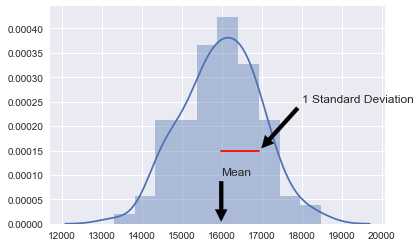

In [6]:
std_list = np.std(new_list)
mean_list = np.mean(new_list)
sns.set()
sns.distplot(new_list)
plt.annotate('Mean', xy=(mean_list, 0.00000), xytext=(mean_list, 0.00010), arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.plot([mean_list, mean_list + std_list], [0.00015, 0.00015], color='red', linestyle='solid')
plt.annotate('1 Standard Deviation', xy=(mean_list + std_list, 0.00015), xytext=(18000, 0.00025), arrowprops=dict(facecolor='black', shrink=0.05)
)


Exercise 5: Gather a stratified random sample of size 500 from `train`, where you stratify on `Store`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a stratified random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [18]:
new_lister = []
for x in range(100):
    strats = stratified_random_sample(train, 'Store', 11)
    new_lister.append(np.mean(strats['Weekly_Sales']))


Text(18000,0.00025,'1 Standard Deviation')

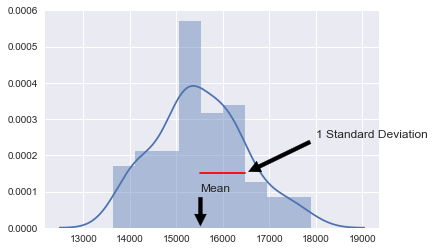

In [19]:
mean_lister = np.mean(new_lister)
std_lister = np.std(new_lister)
sns.set()
sns.distplot(new_lister)
plt.annotate('Mean', xy=(mean_lister, 0.00000), xytext=(mean_lister, 0.00010), arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.plot([mean_lister, mean_lister + std_lister], [0.00015, 0.00015], color='red', linestyle='solid')
plt.annotate('1 Standard Deviation', xy=(mean_lister + std_lister, 0.00015), xytext=(18000, 0.00025), arrowprops=dict(facecolor='black', shrink=0.05)
)


Exercise 6: Gather a cluster random sample of size 500 from `train`, where your sampling unit is `Store`. Calculate the mean of `Weekly_Sales` and append it to a list. Repeat this 100 times, so that you have one list of 100 sample means where each mean is calculated from a cluster random sample of size 500.

Use `sns.distplot()` to plot this list of sample means. Label the chart with the mean and the standard deviation of this list.

In [ ]:
new_cluster = []
for x in range(100):
    cluster = cluster_random_sample(train, 'Store', 1)
    new_cluster.append(np.mean(cluster))


Exercise 7: What do you notice about the means of these distributions? What do you notice about the standard deviations of these distributions? What does this suggest to you about these sampling methods?